In [32]:
import numpy as np
import matplotlib.pyplot as plt
import torch.distributions as dis

plt.style.use("ggplot")
%matplotlib inline

In [12]:
def relative_stat(estimate, se, truth):
	"""Return relative """
	return (estimate - truth) / truth, se / truth


def experiment_step(d_loc, T):
	p = dis.Normal(loc=0, scale=1)
	q = dis.Normal(loc=d_loc, scale=1)
	truth = dis.kl_divergence(q, p)

	x = q.sample(sample_shape=(T,))
	logr = p.log_prob(x) - q.log_prob(x)

	k1 = -logr
	k2 = logr ** 2 / 2
	k3 = (logr.exp() - 1) - logr

	relative_bias_list, relative_se_list = [], []
	for k in (k1, k2, k3):
		relative_bias, relative_se = relative_stat(k.mean(), k.std(), truth)
		relative_bias_list.append(float(relative_bias))
		relative_se_list.append(float(relative_se))
	
	return relative_bias_list, relative_se_list

In [87]:
rel_biaes = []
rel_ses = []
ds = np.linspace(0.1, 2, 100)
T = 100
for d in ds:
	_rel_bias, _rel_se = experiment_step(d, T)
	rel_biaes.append(_rel_bias)
	rel_ses.append(_rel_se)

exp_data = np.column_stack([ds, np.array(rel_biaes), np.array(rel_ses)])

Text(0, 0.5, 'relative bias')

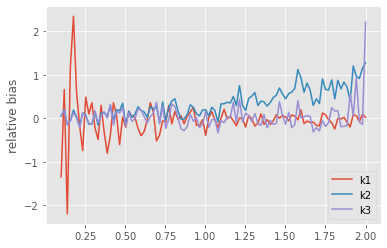

In [88]:
for i in range(1, 4):
	plt.plot(exp_data[:, 0], exp_data[:, i], label='k'+str(i))
plt.legend()
plt.ylabel("relative bias")

Text(0, 0.5, 'relative se')

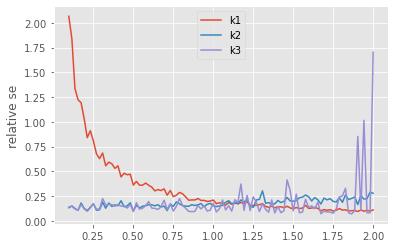

In [89]:
for i in range(4, 7):
	plt.plot(exp_data[:, 0], exp_data[:, i] / np.sqrt(T), label='k'+str(i-3))
plt.legend()
plt.ylabel("relative se")